In [1]:
###Load Packages

#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam
import pybedtools
import gzip as gz

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Calculate readlengths

In [2]:
#Load read data (all reads concat together)
path = "path/to/data/"

EV_R1 = path + "h112.R1_td.fastq.gz"
WT_R1 = path + "h113.R1_td.fastq.gz"
S4A_R1 = path + "h115.R1_td.fastq.gz"
S4D_R1 = path + "h117.R1_td.fastq.gz"
EV_R2 = path + "h112.R2_td.fastq.gz"
WT_R2 = path + "h113.R2_td.fastq.gz"
S4A_R2 = path + "h115.R2_td.fastq.gz"
S4D_R2 = path + "h117.R2_td.fastq.gz"

allreads = path + "all_reads.fastq"


In [3]:
figpath = "./"

In [4]:
#Function to extract read lengths from .fasta files
def getreadlengths(data):
    readlengths = []
    if data.endswith(".gz"):
        with gz.open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)
    else:
        with open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)

In [5]:
#all reads
rl = getreadlengths(allreads)
reads = pd.Series(rl)
rl_df = pd.DataFrame(rl)

#EV, R1
rl_EV_1 = getreadlengths(EV_R1)
reads_EV_1 = pd.Series(rl_EV_1)
rl_df_EV_1 = pd.DataFrame(rl_EV_1)
rl_df_EV_1['Replicate'] = 1

#WT, R1
rl_WT_1 = getreadlengths(WT_R1)
reads_WT_1 = pd.Series(rl_WT_1)
rl_df_WT_1 = pd.DataFrame(rl_WT_1)
rl_df_WT_1['Replicate'] = 1

#4SA, R1
rl_4SA_1 = getreadlengths(S4A_R1)
reads_4SA_1 = pd.Series(rl_4SA_1)
rl_df_4SA_1 = pd.DataFrame(rl_4SA_1)
rl_df_4SA_1['Replicate'] = 1

#4SD, R1
rl_4SD_1 = getreadlengths(S4D_R1)
reads_4SD_1 = pd.Series(rl_4SD_1)
rl_df_4SD_1 = pd.DataFrame(rl_4SD_1)
rl_df_4SD_1['Replicate'] = 1

##########
#EV, R2
rl_EV_2 = getreadlengths(EV_R2)
reads_EV_2 = pd.Series(rl_EV_2)
rl_df_EV_2 = pd.DataFrame(rl_EV_2)
rl_df_EV_2['Replicate'] = 2

#WT, R2
rl_WT_2 = getreadlengths(WT_R2)
reads_WT_2 = pd.Series(rl_WT_2)
rl_df_WT_2 = pd.DataFrame(rl_WT_2)
rl_df_WT_2['Replicate'] = 2

#4SA, R2
rl_4SA_2 = getreadlengths(S4A_R2)
reads_4SA_2 = pd.Series(rl_4SA_2)
rl_df_4SA_2 = pd.DataFrame(rl_4SA_2)
rl_df_4SA_2['Replicate'] = 2

#4SD, R2
rl_4SD_2 = getreadlengths(S4D_R2)
reads_4SD_2 = pd.Series(rl_4SD_2)
rl_df_4SD_2 = pd.DataFrame(rl_4SD_2)
rl_df_4SD_2['Replicate'] = 2


0it [00:00, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

11199136it [00:09, 1182323.85it/s]
2866136it [00:07, 382517.82it/s]
1994972it [00:05, 392408.61it/s]
2138876it [00:05, 366068.31it/s]
571596it [00:01, 390263.59it/s]
1353188it [00:03, 348636.34it/s]
686964it [00:01, 375846.30it/s]
1092344it [00:03, 355874.38it/s]
495060it [00:01, 362052.41it/s]


In [6]:
print(rl_df_EV_1[0].median(),
      rl_df_EV_2[0].median(),
      rl_df_WT_1[0].median(),
      rl_df_WT_2[0].median(),
      rl_df_4SA_1[0].median(),
      rl_df_4SA_2[0].median(),
      rl_df_4SD_1[0].median(),
      rl_df_4SD_2[0].median(),
     )

908.0 1046.0 875.0 970.0 894.0 1024.0 883.0 990.0


In [7]:
allreads_l = getreadlengths(allreads)
reads_all_l = pd.Series(allreads_l)
rl_df = pd.DataFrame(reads_all_l)

11199136it [00:08, 1249613.48it/s]


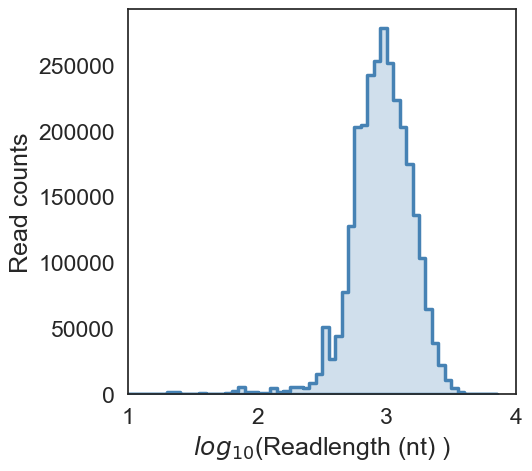

In [10]:
#Plot the readlength distribution of all reads together
fig, (ax1) = plt.subplots(1,1, figsize = (5, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

sns.histplot(data = np.log10(rl_df), binwidth = 0.05, element="step", ax = ax1, legend = False, lw=2.5, palette=['steelblue'])
ax1.set_xlim(1,4)
ax1.set_xlabel('$log_{10}$(Readlength (nt) )')
ax1.set_ylabel('Read counts')

#Save plot as jpeg if using
plt.savefig(figpath + 'read_lengths.png', dpi=300, bbox_inches="tight")

In [11]:
#General read info - min, max, median
print(
    "Minimum readlength: " + str(rl_df.min()[0]) + "\n" +
    "Maximum readlength: " + str(rl_df.max()[0]) + "\n" +
    "Median readdlength: " + str(rl_df.median()[0]) + "\n")

Minimum readlength: 2
Maximum readlength: 6457
Median readdlength: 934.0



# Calculate gene coverage

In [12]:
# Define a function to get a dataframe of coverage for each gene

def get_gene_cov(file, gene, condition):
    data_bedtool = pybedtools.BedTool(file)
    genes_bedtool = pybedtools.BedTool(genes)
    
    df = genes_bedtool.coverage(data_bedtool).to_dataframe(names = ['chr', 'start', 'end', 'name', 'score', 'strand', 'nReadsPerGene', 'nBasesPerGeneCovered', 'geneLength', 'fracBasesPerGeneCovered']) # column 6 is coverage count - how many reads from the data file overlap at each region (gene) in the genes file
    df['sample'] = condition
    
    return df

In [13]:
path = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/"
genes = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/config/only_genes.bed"

In [14]:
h112_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "EV")
h112_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "EV")
h113_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "WT")
h113_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "WT")
h115_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SA")
h115_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SA")
h117_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SD")
h117_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SD")

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutan

In [16]:
all_cov = pd.concat([h112_R1_cov,
                     h112_R2_cov,
                     h113_R1_cov,
                     h113_R2_cov,
                     h115_R1_cov,
                     h115_R2_cov,
                     h117_R1_cov,
                     h117_R2_cov])

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_68479/2384125751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_cov_grouped = all_cov.groupby("name").sum()


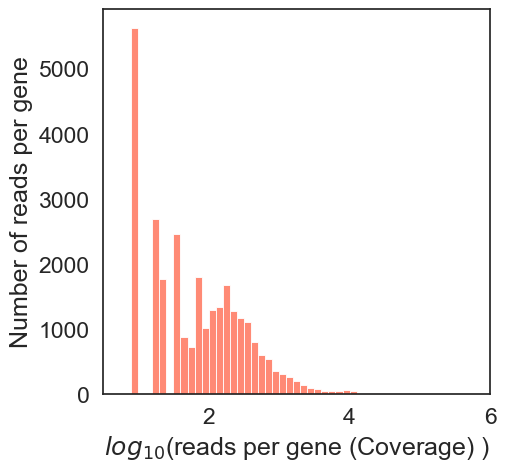

In [17]:
all_cov_grouped = all_cov.groupby("name").sum()

f, ax = plt.subplots(1,1, figsize = (5,5))
sns.histplot(x = np.log10(all_cov_grouped.loc[all_cov_grouped["nReadsPerGene"] >= 1]["nReadsPerGene"]), color = "tomato", binwidth = 0.1)
ax.set_xlabel("$log_{10}$(reads per gene (Coverage) )")
ax.set_ylabel("Number of reads per gene")

ax.set_xlim(0.5,6)

plt.savefig(figpath + 'coverage.png', dpi=300, bbox_inches="tight")

In [18]:
len(all_cov_grouped.loc[all_cov_grouped.nReadsPerGene > 100])

11651